## Get insights from data

> The aim is to get interesting insights from the dataset we have. For example:
1. Which fighter has the most wins?
2. Which fighter has the biggest number of fights?
3. What is the average number of fights before retiring?

> Sounds promising!

In [38]:
# library to easily deal with data
import pandas as pd
import numpy as np

# library required for visualisation
import matplotlib.pyplot as plt

# to count number of occurences in a list
from collections import Counter

%matplotlib inline

# set up the size and the font size of the charts
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})

In [3]:
# load data from csv into a pandas object called dataframe
df_fighters = pd.read_csv('../data/formated/fighters.csv')
df_fighters.head(2)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status
0,Cris,Cyborg,20.0,1.0,0.0,Women_Featherweight,True,Active
1,Nicco,Montano,5.0,2.0,0.0,Women_Flyweight,True,Active


In [4]:
df_fighters.shape

(835, 8)

### First impression
> We have a large dataset of fighters (835 fighters) and at first glance it seems like we can answer the questions we asked earlier with the information we have.
Indeed we know the number of wins, losses and draws for each fighter. We know whether the fighter is active or not and we even have data about the weight class and if a fighter is currently the champion or not.

### Answering the first question: which fighter has the most wins?

In [3]:
df_fighters.sort_values(by=['wins'], ascending=False).head(10)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status
322,Aleksei,Oleinik,56.0,11.0,1.0,Heavyweight,False,Active
25,Matt,Hughes,46.0,9.0,0.0,Welterweight,False,NotFighting
34,Alistair,Overeem,43.0,17.0,0.0,Heavyweight,False,Active
340,Gegard,Mousasi,42.0,6.0,2.0,Middleweight,False,NotFighting
793,Yves,Edwards,42.0,22.0,1.0,Lightweight,False,NotFighting
550,Gleison,Tibau,40.0,14.0,0.0,Lightweight,False,Active
451,Sean,Sherk,38.0,4.0,1.0,Lightweight,False,NotFighting
665,Ben,Rothwell,36.0,10.0,0.0,Heavyweight,False,Active
811,Renan,Barao,36.0,6.0,0.0,Bantamweight,False,Active
432,Josh,Barnett,35.0,8.0,0.0,Heavyweight,False,Active


> Well, we already have our top 10 fighters with the most wins in the UFC history. And we can see that the first one is still fighting!

> You can see how easy it is to get answers from data thanks to pandas. It only took one line of code! The `sort_values` method from pandas library was really helpful. More details [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html).

> That being saig, for those of you who know UFC fighters, I hear you yelling "You're wrong! Michael Bisping, Donald Cerrone and Georges Saint Pierre are the ones that have the most wins in the UFC". And you're right but MMA records in this data set contain fights in other organisations than UFC (for example strikeforce). So to be more accurate, we answered the question: who has the most wins in his/her MMA career? 

### Answering the second question: which fighter has the biggest number of fights?

In [6]:
# first of all, we create a new column containing the total number of fights by adding the number of wins, 
# the number of losses and the number of draws
df_fighters['number_of_fights'] = df_fighters['wins'] + df_fighters['losses'] + df_fighters['draws']

In [7]:
# there might be missing values, let's figure that out
df_fighters[df_fighters['number_of_fights'].isnull()]

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status,number_of_fights


In [8]:
# and there are missing values! It is easier to delete all rows with a number of fights equal to NaN (Not a Number)
df_fighters = df_fighters.dropna()

In [9]:
# then, we sort the values as we previously did for the first question
df_fighters.sort_values(by=['number_of_fights'], ascending=False).head(10)

,first_name,last_name,wins,losses,draws,weight_class,title_holder,fighter_status,number_of_fights
322,Aleksei,Oleinik,56.0,11.0,1.0,Heavyweight,False,Active,68.0
793,Yves,Edwards,42.0,22.0,1.0,Lightweight,False,NotFighting,65.0
34,Alistair,Overeem,43.0,17.0,0.0,Heavyweight,False,Active,60.0
25,Matt,Hughes,46.0,9.0,0.0,Welterweight,False,NotFighting,55.0
550,Gleison,Tibau,40.0,14.0,0.0,Lightweight,False,Active,54.0
340,Gegard,Mousasi,42.0,6.0,2.0,Middleweight,False,NotFighting,50.0
677,Clay,Guida,34.0,15.0,0.0,Lightweight,False,Active,49.0
764,Takanori,Gomi,35.0,14.0,0.0,Lightweight,False,Active,49.0
368,Wanderlei,Silva,35.0,12.0,1.0,Light_Heavyweight,False,NotFighting,48.0
154,Jesse,Taylor,32.0,15.0,0.0,Middleweight,False,Active,47.0


> And here is the result! It seems like the number of fights is correalted with the number of wins. That's normal!

> And unfortunately for the UFC fans, this is not the biggest number of fights in the UFC but the biggest number of professional MMA bouts.

> For those of you who are curious, check the real answer [here](https://en.wikipedia.org/wiki/List_of_UFC_records#Most_bouts).

### Answering the third question: what is the average number of fights before retiring?

> MMA is extremely violent and fighter bodies are hurt throughout their careers. So I found interesting to know how many fights of your favorite fighter you can hope to see before retirement.

In [11]:
# first, split the data set between retired and active fighters
df_fighters_retired = df_fighters[df_fighters['fighter_status'] == 'NotFighting']
df_fighters_active = df_fighters[df_fighters['fighter_status'] == 'Active']

In [19]:
# then create a dictionary with the number of fighters that have fought n times
number_fighters_with_such_number_of_fights = Counter(df_fighters_retired['number_of_fights'])

Text(0,0.5,'Number of fighters')

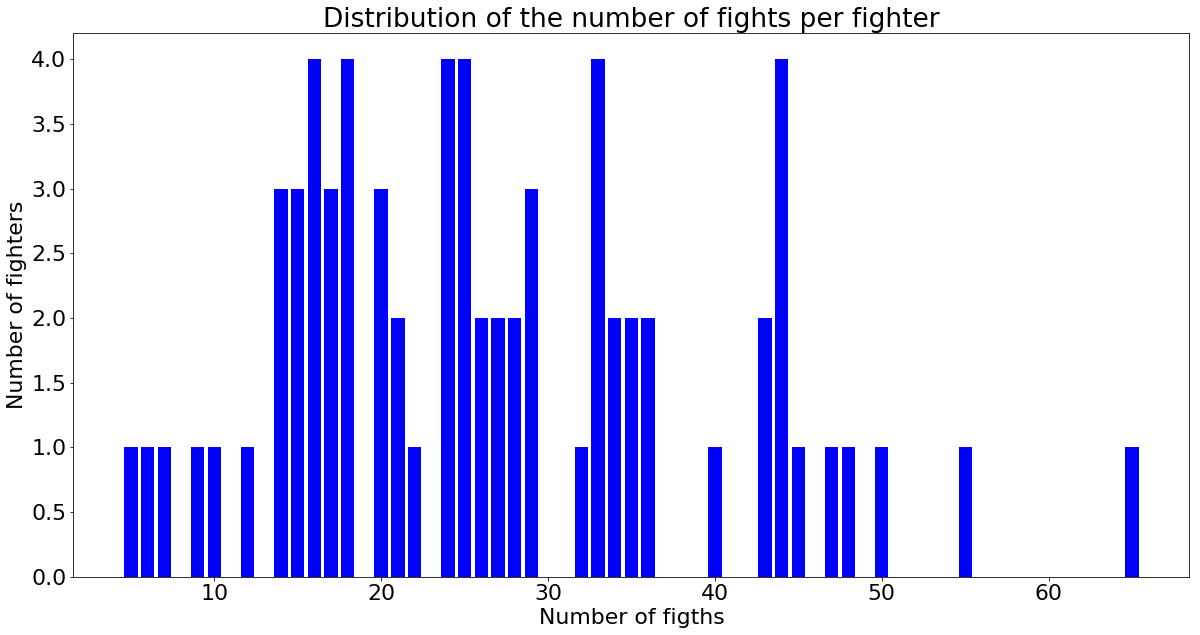

In [20]:
# plot the results
plt.bar(number_fighters_with_such_number_of_fights.keys(), 
        number_fighters_with_such_number_of_fights.values(), color='b')
plt.title('Distribution of the number of fights per fighter')
plt.xlabel('Number of figths')
plt.ylabel('Number of fighters')

#### What about this plot?

> We can conclude there is no clear distribution. There are lots of retired fighters that have between 14 and less than 30 fights. But the fact is that it depends on the age they fought for the first time, the weight class they belong to, the results they got and so on ...

> But what is the number of fights for an average fighter?

In [21]:
def get_avg_number_fights(df_fighters_to_consider):
    return int(df_fighters_to_consider['number_of_fights'].mean())

In [22]:
print('An average fighter fights {} times before retiring'.format(get_avg_number_fights(df_fighters_retired)))

An average fighter fights 26 times before retiring


### Events data set

> We still have a lot to explore! We have data on events from the first UFC event to the last one.

> The UFC seems to organize the events in the U.S. and not so much outside the U.S. Is that true?

> Some fans find there are too much events. A lot more than before. We'll check that too.

In [23]:
# load data from the dataset into a pandas dataframe
df_events = pd.read_csv('../data/formated/events.csv')

In [24]:
locations = df_events['location'].dropna()

In [25]:
# let's create a small function that could be useful later
def get_distribution(data):
    """returns a dictionnary with the frequency of each value in the data given"""
    return Counter(data)

In [26]:
# get the number of events that a city hosted
number_events_per_city = get_distribution(locations)
# sorting, first item in the list will be the city with the biggest number of events hosted
number_events_per_city_sorted = sorted(number_events_per_city.items(), key=lambda x: x[1], reverse=True)
# print top 5 by slicing the list sorted 
number_events_per_city_sorted[:5]

[('Las Vegas, Nevada', 91),
 ('Las Vegas, NV', 37),
 ('Toronto, Ontario', 15),
 ('Denver, CO', 13),
 ('London, England', 8)]

## New data set, new questions
> At present, we'll dive into more details with this data set that contains data about all fights from the beginning of the UFC

> Let's explore that new data set quickly!

In [28]:
df_fights = pd.read_csv('../data/formated/fights.csv')
df_fights.columns

Index(['fighter1_last_name', 'fighter2_last_name', 'weight_class',
       'fighter1reach', 'fighter2reach', 'fighter1height', 'fighter2height',
       'is_title_fight', 'is_main_event', 'fighter1_rank', 'fighter2_rank',
       'fighter1_is_winner', 'fighter2_is_winner', 'method', 'ending_time',
       'ending_time.1', 'ending_round', 'submission', 'end_strike',
       'end_target', 'end_position', 'is_fotn', 'event_date'],
      dtype='object')

In [29]:
df_fights[85:90]

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn,event_date
85,Dawodu,Arnett,Featherweight,73.0,72.0,68.0,72.0,False,False,NaN,...,Decision - Unanimous,05:00,05:00,3.0,NaN,NaN,NaN,NaN,NaN,2018-07-28T00:00:00Z
86,Johnson,Makhachev,Lightweight,75.0,70.0,71.0,70.0,False,False,NaN,...,Submission,04:43,04:43,1.0,Armbar,NaN,NaN,From Mount,NaN,2018-07-28T00:00:00Z
87,Antigulov,Cutelaba,Light_Heavyweight,70.0,75.0,71.0,73.0,False,False,NaN,...,KO/TKO,04:25,04:25,1.0,NaN,Elbows,Head,In Clinch,NaN,2018-07-28T00:00:00Z
88,Makdessi,Pearson,Lightweight,68.0,69.0,68.0,68.0,False,False,NaN,...,Decision - Unanimous,05:00,05:00,3.0,NaN,NaN,NaN,NaN,1.0,2018-07-28T00:00:00Z
89,Davis,Chookagian,Women_Flyweight,68.0,68.0,66.0,69.0,False,False,6,...,Decision - Unanimous,05:00,05:00,3.0,NaN,NaN,NaN,NaN,NaN,2018-07-28T00:00:00Z


> We have some interesting information about the fights like the way it ended and who is the winner.

### Questions
> Time for questions!

> What can we get from this? What about ...
1. The distribution of the ways to finish a fight?
2. The reach advantage. Is that truly an advantage?
3. The stats on title fights, main events and regular fights.
4. The way to get a Fight Of The Night (FOTN) bonus.
5. The most common submssions in UFC. Did it evolve? Are there some trends across UFC history?

In [31]:
ways_to_finish = df_fights['method'].dropna()
distribution_ways_to_finish = get_distribution(ways_to_finish)
distribution_ways_to_finish

Counter({'KO/TKO': 1535,
         'Decision - Split': 450,
         'Submission': 987,
         'Decision - Unanimous': 1574,
         'Decision - Majority': 50,
         "TKO - Doctor's Stoppage": 68,
         'DQ': 14,
         'Overturned': 34,
         'Could Not Continue': 12,
         'Other': 2})

> Ok, this is interesting. I guess *DQ* stands for *Disqualified*. But I don't know about you but I don't get the meaning of *Overturned* and *Could not continue* in that context.  Let's use our knowledge to understand the meaning of those words.

In [32]:
df_fights[df_fights['method'] == 'Overturned'].head(3)

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn,event_date
601,Cormier,Jones,Light_Heavyweight,72.0,84.0,71.0,76.0,True,True,C,...,Overturned,03:01,03:01,3.0,NaN,Kick,Head,At Distance,NaN,2017-07-29T00:00:00Z
648,Bessette,Holobaugh,Featherweight,NaN,NaN,70.0,71.0,False,True,NaN,...,Overturned,02:59,02:59,1.0,NaN,Punches,Head,At Distance,NaN,2017-07-11T00:00:00Z
797,Belfort,Gastelum,Middleweight,74.0,71.0,72.0,69.0,False,True,NaN,...,Overturned,03:52,03:52,1.0,NaN,Punch,Head,In Clinch,NaN,2017-03-11T00:00:00Z


> Ok now I see. This label is given to a fight when at least one of the fighters has been tested positive to illicit products. That's what happened to Jon Jones for example. He won that fight against Daniel Cormier but has been tested positive afterwards.

> What about *Could not continue*?

In [33]:
df_fights[df_fights['method'] == 'Could Not Continue'].head(2)

,fighter1_last_name,fighter2_last_name,weight_class,fighter1reach,fighter2reach,fighter1height,fighter2height,is_title_fight,is_main_event,fighter1_rank,...,method,ending_time,ending_time.1,ending_round,submission,end_strike,end_target,end_position,is_fotn,event_date
740,Alvarez,Poirier,Lightweight,69.0,72.0,69.0,69.0,False,False,4,...,Could Not Continue,04:02,04:02,2.0,NaN,NaN,NaN,NaN,NaN,2017-05-13T00:00:00Z
886,Oliveira,Means,Welterweight,76.0,75.0,71.0,74.0,False,False,14,...,Could Not Continue,03:33,03:33,1.0,NaN,NaN,NaN,NaN,NaN,2016-12-30T00:00:00Z


> Looks like another definition of **no contest**.

> As far as I know, the two first fights in this list ended up in a **no contest** decision because of illegal shots. I remember those illegal knees from Alvarez. The rule is that you can't throw a knee to the head of your opponent if he has one hand on the ground. This is what Alvarez did.

> To conclude, all those fights are not relevant for our analysis because there actually is no result.

> Ok so now we can create the final dictionnary that contains the distribution of ways to finish.
We can gather the number of split decisions with the number of unanimous and majority decisions.

In [34]:
# aggregate all kinds of decision into a single field named 'Decision'
number_of_decisions = distribution_ways_to_finish['Decision - Unanimous'] \
                        + distribution_ways_to_finish['Decision - Split'] \
                        + distribution_ways_to_finish['Decision - Majority']
distribution_ways_to_finish['Decision'] = number_of_decisions

# remove data we don't want
columns_to_remove = ['Decision - Unanimous', 'Decision - Split', 'Decision - Majority', 'DQ', 'Overturned', 'Other', 'Could Not Continue']
for column in columns_to_remove:
    distribution_ways_to_finish.pop(column)

> Let's visualize that with a beautiful (at least I hope) pie chart!

Text(0.5,1,'Ways to finish a fight in UFC')

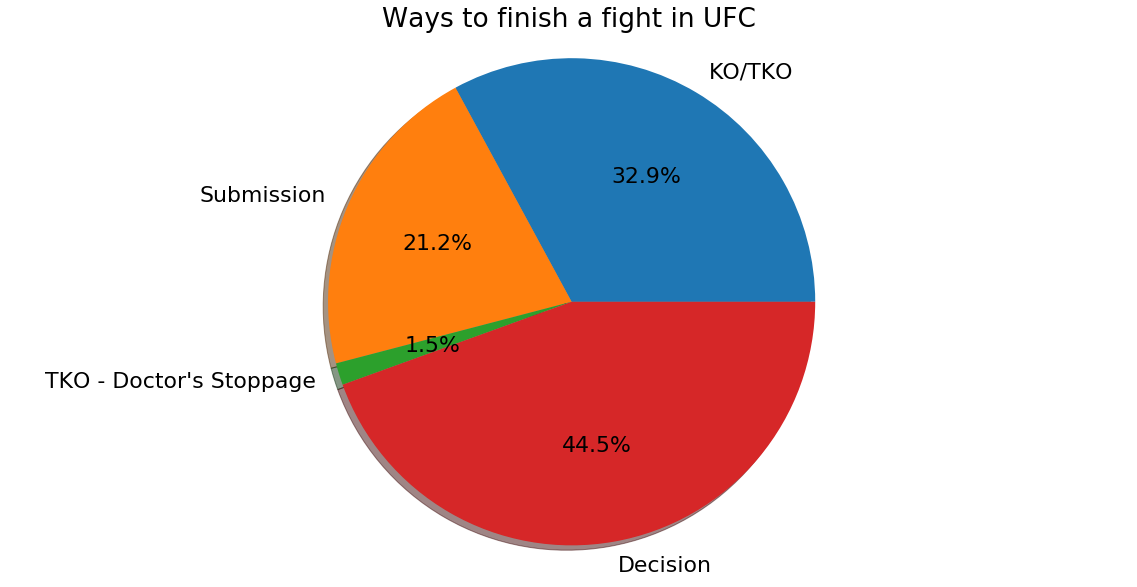

In [35]:
# data to plot, need to convert the dictionnary into two special objects
labels = distribution_ways_to_finish.keys()
sizes = distribution_ways_to_finish.values()

# actual plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
 
plt.axis('equal')
plt.title('Ways to finish a fight in UFC')

### Conclusion

> From that we can conclude that if a fight has a winner and there is no disqualification afterwards, the most common way for a random fight to finish is to go to the descision (almost half of the fights). Then comes the KO/TKO (one third of the fights) and the submission (a bit more than one fifth).

> No surprise here it would be interesting to compare the distribution from each year. Has it significantly changed? And secondly, it could be interesting to make the same study for each category and in function of the gender.

### Submissions
> I've always been fascinated by submissions. Jiu-Jitsu is a must-have for every fighter. There are many types of submissions. Each fighter has his set of submissions and is ready to make use of it at any time to get the victory.

> The question is what are the most common and the rarest submissions.

In [36]:
# skip NaN values because that means the fighter didn't win thanks to a submsiion
submission_frequencies = get_distribution(df_fights['submission'].dropna())

Text(0.5,1,'Submission frequencies')

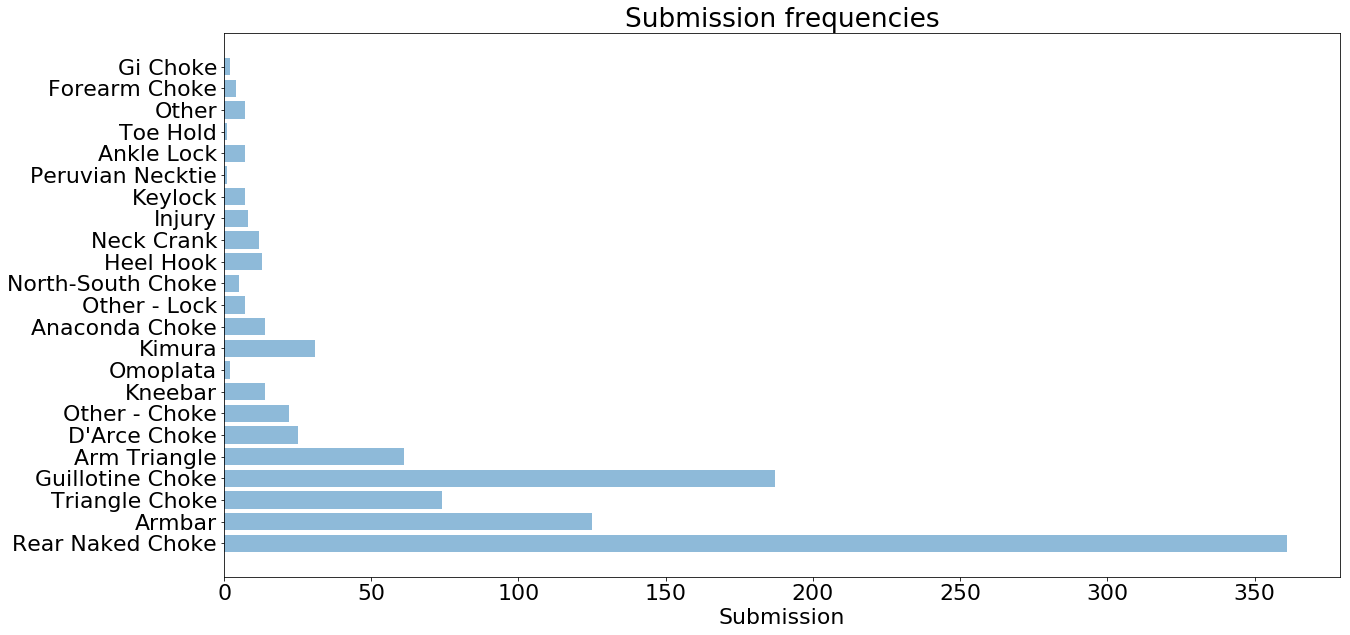

In [37]:
# there are too many items (23) to do a pie chart so we'll go with an horizontal bar chart
submission_names = list(submission_frequencies.keys())
y_pos = np.arange(len(submission_names))
frequencies = list(submission_frequencies.values())
 
plt.barh(y_pos, frequencies, align='center', alpha=0.5)
plt.yticks(y_pos, submission_names)
plt.xlabel('Submission')
plt.title('Submission frequencies')

#### More insights!
> This is definitely interesting to see that the rear naked choke is by far the most commonly way to finish a fight with a submission. Then come the guillotine and the armbar.

> Submissions like the omoplata or the gi choke are very rare because they are very difficult to do.

> What could be interesting is to know if there are some trends. Has the rear naked choke always be the most common submission? When did all submissions appear in the UFC?

> Let's visualize that out with what we call a heatmap.

In [39]:
# because we'll have to deal with dates, it is useful to convert the dates (str format)
# into datetime format
df_fights['event_date'] = df_fights['event_date'].apply(pd.to_datetime)

In [40]:
# first we need to know what is the date of the first event in the UFC
# and the date of the last event announced
firstdate = df_fights['event_date'][df_fights.shape[0]-1]
lastdate = df_fights['event_date'][0]

In [41]:
def get_all_fights_for_given_year(all_fights, year):
    """Given a year, returns a pandas dataframe that contains all fights for this year"""
    return all_fights[all_fights['event_date'].dt.year == year]

In [42]:
# The problem with the dictionnary we create is that it is the mirror of a year
# and from a year to another, there are different submissions.
# But we want a list with the frequency of each submission in the same order for each year
# so we'll create this helper function
def get_list_frequencies(list_submissions, submission_names_and_frequencies):
    """given the overall list of submissions (all submissions in UFC history), 
    returns a list with the frequencies of each submission"""
    frequencies = [0 for i in range(len(list_submissions))]
    for submission in list_submissions: # for each submission in the UFC history
        # if the submission has been used this year
        if submission in submission_names_and_frequencies: 
            # add the frequency at the specific index 
            frequencies[list_submissions.index(submission)] = \
                submission_names_and_frequencies[submission]   
    return frequencies

In [43]:
frequencies_by_year = []
for year in range(firstdate.year, lastdate.year + 1):
    fights_for_this_year = get_all_fights_for_given_year(df_fights, year)
    frequencies = get_distribution(fights_for_this_year['submission'].dropna())
    frequencies_by_year.append(get_list_frequencies(submission_names, frequencies))

Text(0.5,1,'Frequency of submissions (number/year)')

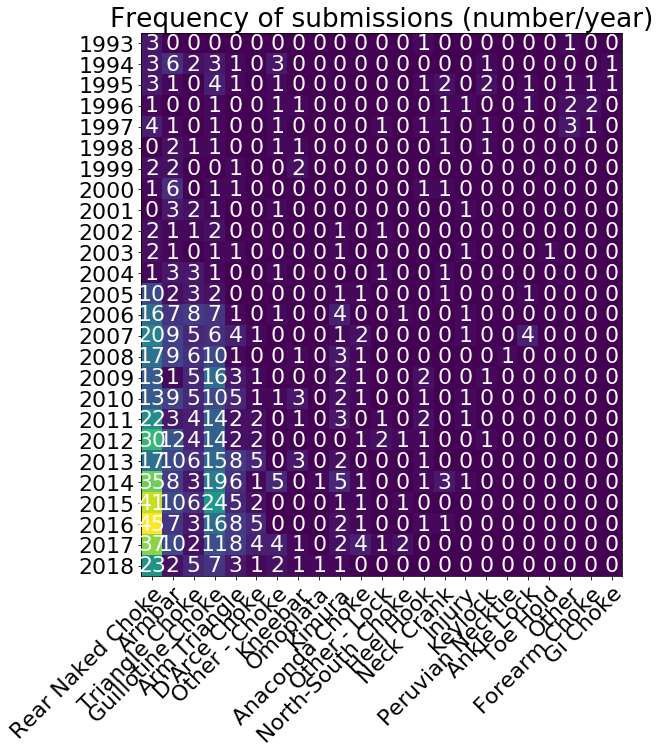

In [44]:
years = [i for i in range(firstdate.year, lastdate.year + 1)]

fig, ax = plt.subplots()
im = ax.imshow(frequencies_by_year)

# We want to show all ticks...
ax.set_xticks(np.arange(len(submission_names)))
ax.set_yticks(np.arange(len(years)))
# ... and label them with the respective list entries
ax.set_xticklabels(submission_names)
ax.set_yticklabels(years)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(submission_names)):
        text = ax.text(j, i, frequencies_by_year[i][j],
                       ha="center", va="center", color="w")

ax.set_title("Frequency of submissions (number/year)")